<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%204/Flu/Colab%20Notebook/Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()


Shape: (1482, 20)


,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Simpan target dulu
target = "Diagnosis"

# Drop kolom 'InitialPCRDiagnosis' karena isinya kosong total
df.drop(columns=['InitialPCRDiagnosis'], inplace=True)

# Pisahkan kategorikal & numerik
categorical_cols = df.select_dtypes(include='object').columns.drop(target)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Tangani missing value
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Encode kategorikal pakai LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target])  # H1N1 = 0, H3N2 = 1
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Missing values after cleaning:", df.isnull().sum().sum())


Missing values after cleaning: 0


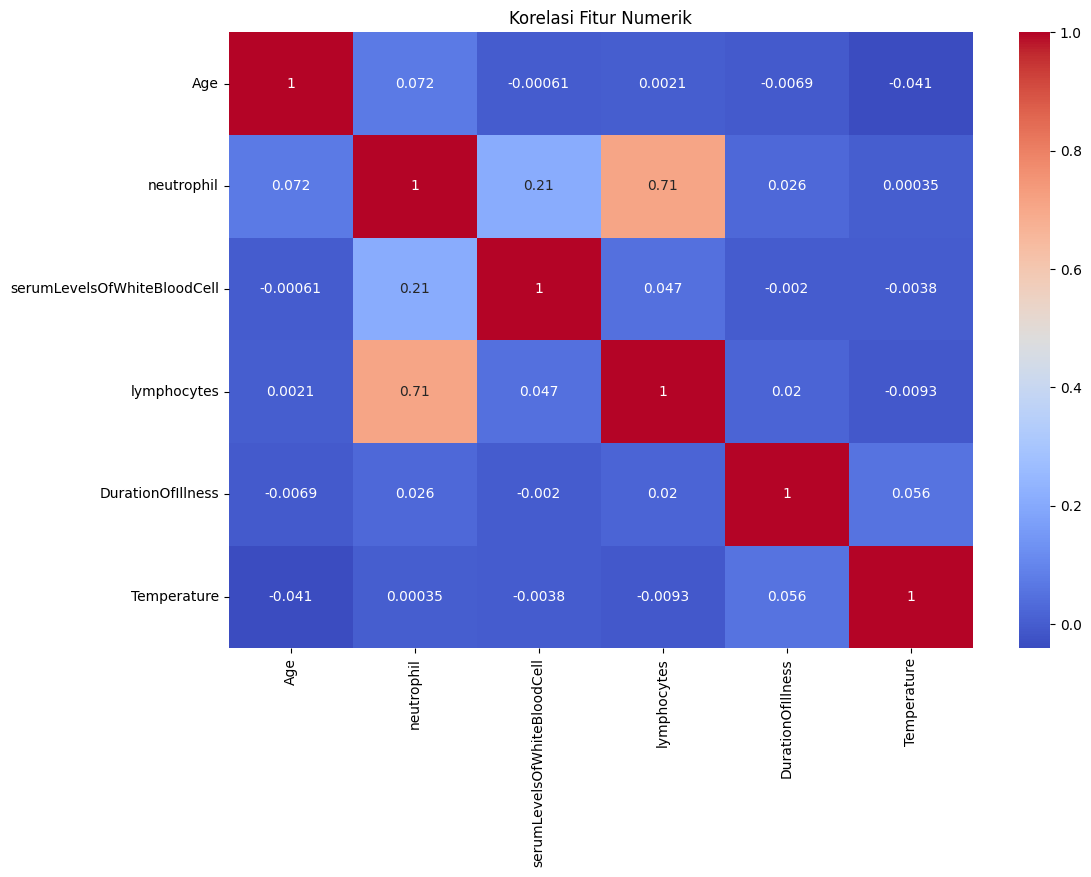

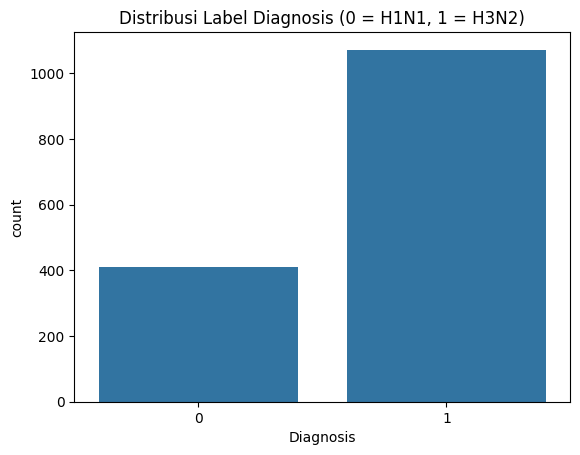

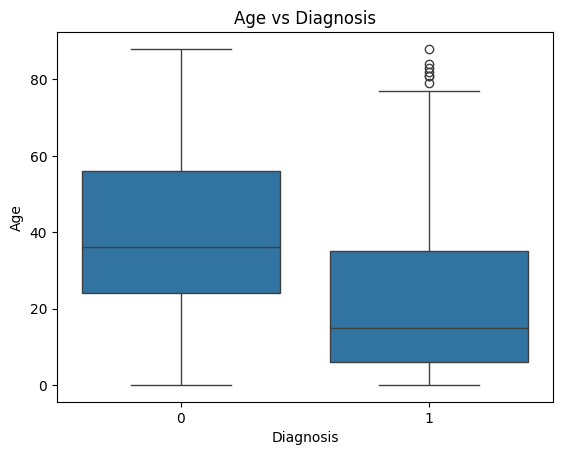

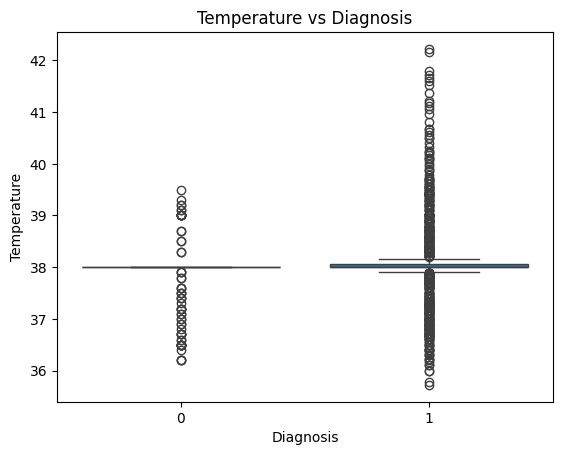

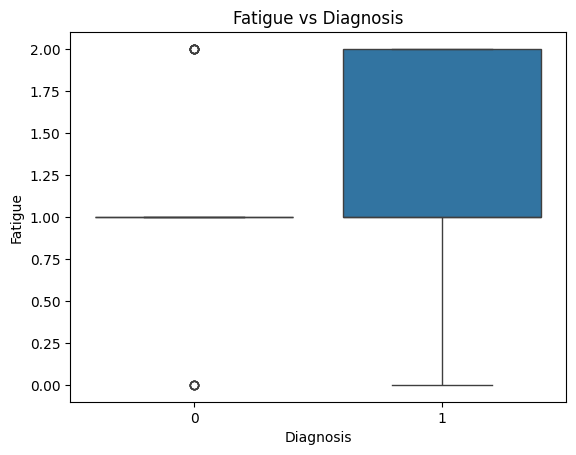

In [9]:
# Korelasi fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

# Distribusi target
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribusi Label Diagnosis (0 = H1N1, 1 = H3N2)")
plt.show()

# Visualisasi beberapa fitur terhadap label
for col in ['Age', 'Temperature', 'Fatigue']:
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f"{col} vs Diagnosis")
    plt.show()


In [10]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


Classification Report:

              precision    recall  f1-score   support

        H1N1       0.90      0.93      0.92        90
        H3N2       0.97      0.96      0.96       207

    accuracy                           0.95       297
   macro avg       0.94      0.94      0.94       297
weighted avg       0.95      0.95      0.95       297

Confusion Matrix:
[[ 84   6]
 [  9 198]]


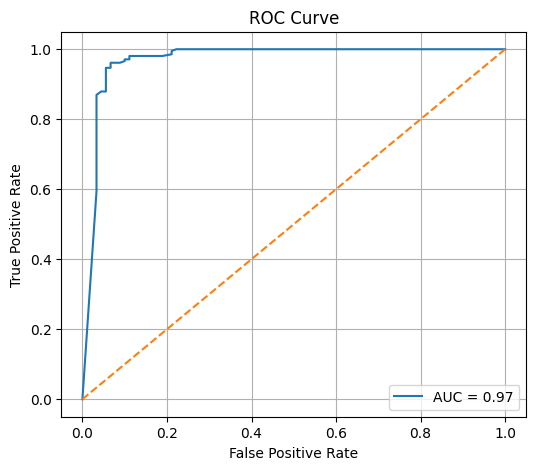

In [11]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["H1N1", "H3N2"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
